# Computational Social Science Project #3 

**Enter your Name:**Taylor Galdi

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# look at the inspections data
chicago_inspections_2011_to_2013.tail()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
17672,1393258,2013-12-17,CIAO BELLA CAFE,CIAO BELLA CAFE,2232690,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,Canvass,Pass,42.005587,-87.661077,"(42.00558686485114, -87.66107732040031)",Restaurant,0,0,6,1,0,1,0,2,6,0.452055,0,2232690-20130327,2232690.0,378808.0,"CIAO BELLA CAFE, INC.",CIAO BELLA CAFE,6800-6806 N SHERIDAN RD,CHICAGO,IL,60626.0,49.0,36.0,49-36,24.0,1006.0,Retail Food Establishment,735,Preparation of Food and Dining on Premise With...,2232690.0,ISSUE,2013-03-27,2015-04-15,AAI,42.005587,-87.661077,2013-03-27,2015-04-15,0.726027,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,25.370000,7.963333,0.776667,10.537839,1.376266,21.726951,0
17673,1395218,2013-12-31,Christian Fields Style Bar,NaN,2002599,Restaurant,Risk 2 (Medium),6550 S COTTAGE GROVE AVE,CHICAGO,IL,60637.0,Canvass,Pass,41.775275,-87.605963,"(41.77527503998271, -87.605963353554)",Restaurant,0,0,4,1,0,0,0,1,4,1.200000,0,2002599-20130716,2259935.0,315535.0,CHRISTIAN FIELDS INC.,CHRISTIAN FIELDS STYLE BAR,6550 S COTTAGE GROVE AVE 1ST,CHICAGO,IL,60637.0,20.0,18.0,20-18,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2002599.0,RENEW,2013-07-16,2015-07-15,AAI,41.775275,-87.605963,2009-11-18,2017-07-15,4.120548,0,0,0,0,0,1,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,56.680038,19.736283,32.355622,0
17674,1395224,2013-12-31,W CHICAGO - LAKESHORE,W CHICAGO,2189458,Restaurant,Risk 1 (High),644 N LAKE SHORE DR,CHICAGO,IL,60611.0,Canvass,Pass w/ Conditions,41.893871,-87.615275,"(41.89387134779289, -87.61527477728374)",Restaurant,3,3,5,0,0,0,0,0,0,2.000000,1,2189458-20130213,2189458.0,375962.0,CHSP TRS LAKESHORE LLC,W CHICAGO-LAKESHORE,644 N LAKE SHORE DR 1-32,CHICAGO,IL,60611.0,42.0,63.0,42-63,18.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2189458.0,ISSUE,2013-02-13,2015-02-15,AAI,41.893871,-87.615275,2013-02-13,2019-02-15,0.879452,0,0,0,0,0,0,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,10.937753,0.000002,19.213021,1
17675,1441493,2012-05-18,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,COURTYARD CAFE,1142007,Restaurant,Risk 1 (High),836 W WELLINGTON AVE,CHICAGO,IL,60657.0,Canvass,Pass,41.936450,-87.650552,"(41.93645016758182, -87.65055245204128)",Restaurant,0,0,3,1,0,0,0,0,3,0.000000,0,1142007-20110216,2071165.0,63145.0,ADVOCATE NORTH SIDE HEALTH NETWORK,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,836 W WELLINGTON AVE # 1,CHICAGO,IL,60657.0,44.0,14.0,44-14,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1142007.0,RENEW,2011-02-16,2013-02-15,AAI,41.936450,-87.650552,2002-03-20,2019-02-15,10.169863,0,0,0,0,0,0,0,0,0,0,0,0,0.000383,72.946667,10.143333,0.430000,40.972732,4.839867,20.946616,0
17676,1493801,2013-02-13,SODEXHO,SODEXHO,20432,Restaurant,Risk 1 (High),230 S LA SALLE ST,CHICAGO,IL,60604.0,Canvass,Pass,41.878538,-87.632414,"(41.878538291685196, -87.63241426118783)",Restaurant,0,0,4,1,0,0,0,0,4,0.000000,0,20432-20110216,2071169.0,63300.0,"SODEXO MANAGEMENT, INC.",SODEXO,230 

In [5]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

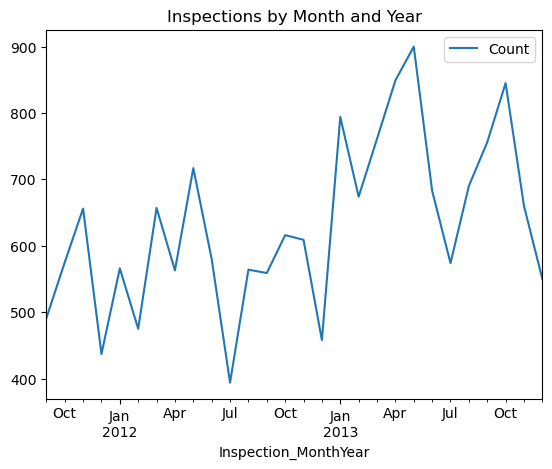

In [8]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

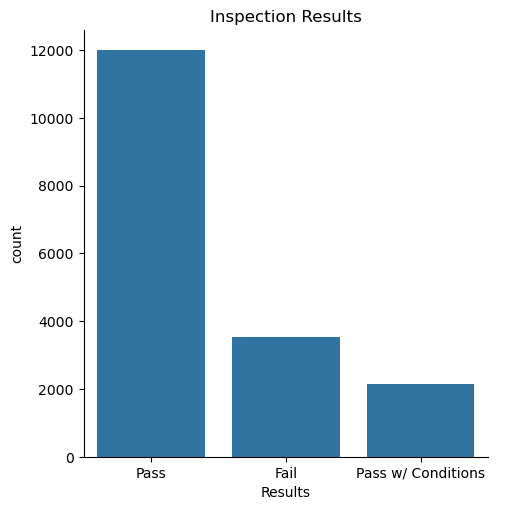

In [9]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

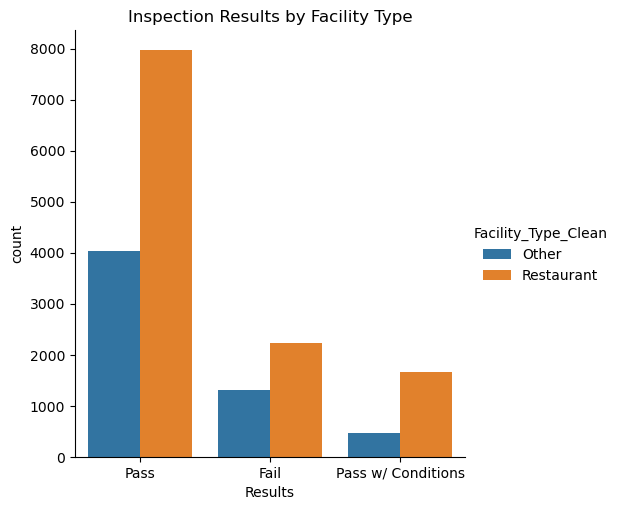

In [10]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

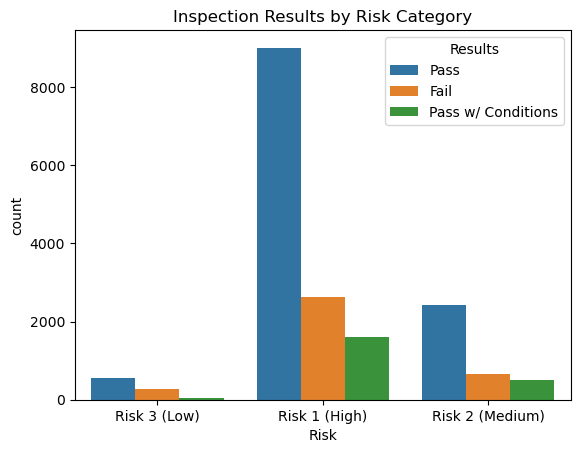

In [11]:
# view inspection results by risk category
sns.countplot(data=chicago_inspections_2011_to_2013,
               x="Risk",
               hue="Results")  
plt.title("Inspection Results by Risk Category")
plt.show()

## 2. Data Preprocessing and Cleaning

In [12]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [13]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

ypre=y
ypre=y.value_counts()
print("Original class distribution before redistributing 'Pass w/conditions' :\n", ypre)

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
#Replace 'Pass w/ Conditions' with 'Fail'
y = y.replace({'Pass w/ Conditions': 'Pass'})
class_distribution=y.value_counts()
print("Original class distribution after redistributing 'Pass w/conditions':\n", class_distribution)

#lb_style = LabelBinarizer()

#y = lb_style.fit_transform(y)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

Original class distribution before redistributing 'Pass w/conditions' :
 Results
Pass                  10259
Fail                   3087
Pass w/ Conditions     1965
Name: count, dtype: int64
Original class distribution after redistributing 'Pass w/conditions':
 Results
Pass    12224
Fail     3087
Name: count, dtype: int64


Although I initially kept the 'Pass w/ Conditions' as-is, I decided to eventually redistribute the class of 'Pass w/ Conditions' into the 'Pass' class. Although putting 'Pass w/ Conditions' with 'Fail' would help with the imbalance, we'll fix this later by over and undersampling.

In [14]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [15]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [16]:
# Set seed
np.random.seed(10)


# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                            y, 
                                                            train_size = .80, 
                                                            test_size = .20, 
                                                            stratify = y)

In [17]:
# Display the counts of each class
sample_distribution = y_train.value_counts()

# Show the class distribution

print("Class distribution of original datase (again, for comparison):\n", class_distribution)
print("Class distribution of sample:\n", sample_distribution)

Class distribution of original datase (again, for comparison):
 Results
Pass    12224
Fail     3087
Name: count, dtype: int64
Class distribution of sample:
 Results
Pass    9779
Fail    2469
Name: count, dtype: int64


In [18]:
#Display ratios
# Class counts
pass_count = sample_distribution.get('Pass', 1)
fail_count = sample_distribution.get('Fail', 0)

# Total observations
total_count = pass_count + fail_count 

# Calculate the ratios
pass_ratio = pass_count / total_count
fail_ratio = fail_count / total_count

# Print the ratios
print("Class balance before re-sampling:")
print(f"Pass: {pass_ratio:.3f}")
print(f"Fail: {fail_ratio:.3f}")

Class balance before re-sampling:
Pass: 0.798
Fail: 0.202


So the original ratios are  0.798/0.202 for "Pass", "Fail" respectively. This is very imbalanced. When we resample (below) by oversampling our underrepresented class ("Fail" ), we'll fix this by changing the ratios to 0.6/0.4 for "Pass", "Fail" respectively. We will not apply weights to our individual models.

In [19]:
# install imbalance-learn 
!pip install imbalanced-learn==0.09.1

In [20]:
# call libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [21]:
#Display new ratios
# Class counts
finalpass_count = Counter(y_train).get('Pass', 1) 
finalfail_count = Counter(y_train).get('Fail', 0) 


# Total observations
finaltotal_count = finalpass_count + finalfail_count 

# Calculate the ratios
finalpass_ratio = finalpass_count / finaltotal_count
finalfail_ratio = finalfail_count / finaltotal_count

# Print the ratios
print("Class balance after over and undersampling:")
print(f"Pass: {finalpass_ratio:.3f}")
print(f"Fail: {finalfail_ratio:.3f}")

Class balance after over and undersampling:
Pass: 0.798
Fail: 0.202


In [22]:
totaldata=total_count
# intitate instance of sampler and specify strategy
newpass_count = round (.6 * totaldata)
newfail_count = round (.4 * totaldata)
# Create a dictionary for the sampling strategy (desired target counts)
oversampling_strategy = {
    'Fail': newfail_count,
}

undersampling_strategy = {
    'Pass': newpass_count,
}

# Apply the RandomOverSampler to increase the minority classes
random_over_sampler = RandomOverSampler(sampling_strategy=oversampling_strategy)

X_train, y_train = random_over_sampler.fit_resample(X_train, y_train)

print("Class distribution after oversampling:", Counter(y_train))

# Then, apply the RandomUnderSampler to reduce the majority class to .5 ratio
random_under_sampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, 
                                          replacement=True)

X_train, y_train = random_under_sampler.fit_resample(X_train, y_train)

print("Class distribution again after undersampling:", Counter(y_train))


Class distribution after oversampling: Counter({'Pass': 9779, 'Fail': 4899})
Class distribution again after undersampling: Counter({'Pass': 7349, 'Fail': 4899})


### Model 1 Random Forest

A random forest is an ensemble method that builds off of the logic of decision trees. It is an ensemble method because it creates multiple decision trees that are individually using a subset of the features in our dataset. Essentially, the decision trees consider our features and recursively 'splits' individual cases into one of two branches based on each cases' 'fit' based on the particular split in question, then the tree iterates down until either all cases in the node are 'pure' or based on a pre-specified tree depth. This method grows the random forest of many decision trees, the trees make predictions, and then the method takes a 'vote' of all the predictions the trees made. A key assumption of the decision trees and random forest is that the trees are different from one another (which makes sense, as we wouldn't want a forest of similar decision trees, it would not tell us much more than a few trees could). Although decision trees are considered "computationally greedy" because they make the decisions at the level of the individual split, random forests help to combat this by averaging over many trees rather than a single tree. Random forest is a good model to employ here because it is not as prone to overfitting.


In [23]:
#initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
    n_estimators=100,              # number of trees
    criterion='gini',              # splitting criterion
    max_depth=None,                # no limit on depth
    min_samples_split=2,           # min samples for splitting a node
    min_samples_leaf=1,            # min samples for a leaf
    min_weight_fraction_leaf=0.0,  # min weighted fraction of leaf
    max_features=None,             # use all features to split
    max_leaf_nodes=None,           # no limit on leaf nodes
    min_impurity_decrease=1e-07,   # early stopping threshold
    random_state=10,               # set random seed for reproducibility
)

In [24]:
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [10, 20, None],          # Max depth of trees
    'min_samples_split': [2, 5, 10]       # Minimum samples required to split a node
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [25]:
# Make predictions on the validation set
from sklearn.metrics import accuracy_score
y_pred = best_rf.predict(X_validate)  
validation_accuracy = accuracy_score(y_validate, y_pred)  
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.9246


In [26]:
# specify cross-validation
# ----------
scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean():.4f}")

Cross-validation scores: [0.92262488 0.92096669 0.91443501 0.92978445 0.92521228]
Average cross-validation score: 0.9226


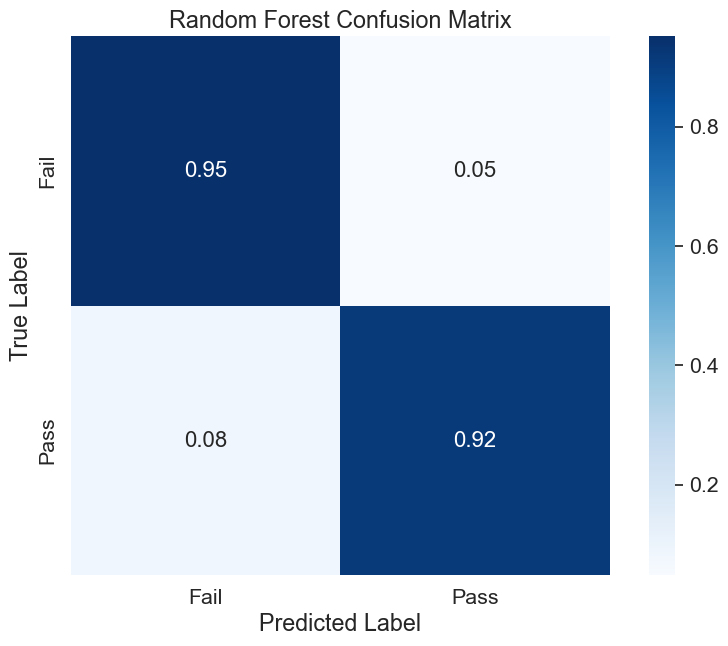

In [27]:
# Generate the confusion matrix
rfcf_matrix = confusion_matrix(y_validate, y_pred, 
                               normalize="true")

# Convert to DataFrame
cm_df = pd.DataFrame(rfcf_matrix, 
                           index=['Fail', 'Pass'],  # True labels
                           columns=['Fail', 'Pass'])  # Predicted labels


# Set figure specifications
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # For label size

# Plot the heatmap
sns.heatmap(cm_df, 
            annot=True, 
            annot_kws={"size": 16}, 
            fmt=".2f",  # Format the numbers as floats with 2 decimal places
            cmap="Blues",  # Color scheme for the heatmap
            cbar=True,     # Show the color bar
            square=True)   # Keep the heatmap square

# Titles and labels
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Model 2 Logistic Regression

We have used logistic regression before, but in essence it is a linear model that shows us the relationship between our features and target. It can tell us the probability that a given case belongs to our one of our target classes. However, logistic regression assumes a linear relationship and also assumes that our features are not highly correlated with one another, though it is not entirely clear in our particular context whether this is the case. Because our prediction is binary, it might be helpful to use logistic regression, at least as a comparison/benchmark.

In [28]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

# predict on the validation data
y_pred = logit_model.predict(X_validate)


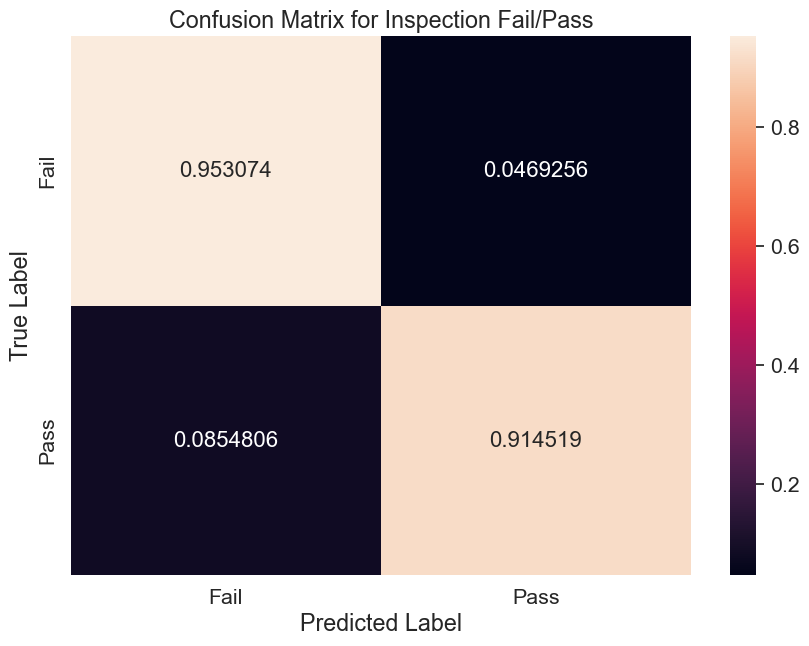

In [29]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, index=["Fail", "Pass"], columns=["Fail", "Pass"])

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Fail", 1: "Pass"})
df_cm.index = ["Fail", "Pass"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix for Inspection Fail/Pass")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9232778321906627


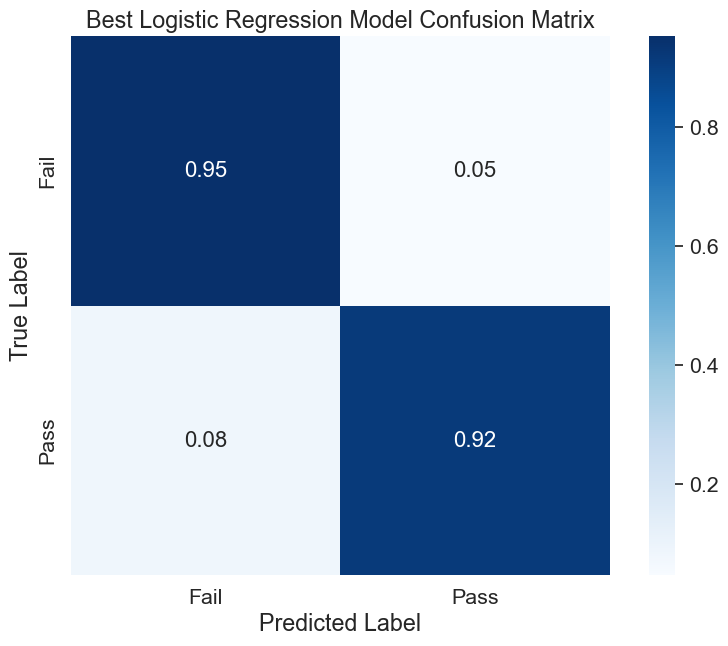

In [31]:
# Create a confusion matrix
bestlrcf_matrix = confusion_matrix(y_validate, 
                             best_logit_pred, 
                             normalize = "true")

# Convert to DataFrame
bestlrdf_cm = pd.DataFrame(bestlrcf_matrix, 
                           index=['Fail', 'Pass'],  # True labels
                           columns=['Fail', 'Pass'])  # Predicted labels

# Set figure specifications
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # For label size

# Plot the heatmap
sns.heatmap(bestlrdf_cm, 
            annot=True, 
            annot_kws={"size": 16}, 
            fmt=".2f",  # Format the numbers as floats with 2 decimal places
            cmap="Blues",  # Color scheme for the heatmap
            cbar=True,     # Show the color bar
            square=True)   # Keep the heatmap square

# Titles and labels
plt.title("Best Logistic Regression Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Model 3 ADABoost

Whereas random forest is a 'bagging' method, meaning it builds trees "based on bootstrap samples (with replacement)" and then 'votes' in the aformentioned way, ADABoost grows trees sequentially building off of prior trees. Specifically, with each new tree grown, ADABoost uses the residuals from the prior tree, as in the misclassified cases, in its construction through weights, upweighting cases with more error. It combines these weak learners with the assumption that this creates a 'strong learner' or stronger prediciton. Though this ultimately may not be the model we use, it is helpful to compare its performance to the random forest to see whether bagging or boosting seems most appropriate given the data.

In [32]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [33]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [34]:
# calculate mean score across models 
# ----------
scores.mean()

0.9146365471623236

### Model 4 Voting Classifier

Our voting classifier will take the predictions from our aformentioned models and combine them to make a final prediction. We will employ both a 'hard voting' method, which takes the majority predicted class from all our individual models (i.e. pass or fail) and also 'soft voting' which instead takes the average probabity that a case belongs to a particular class (i.e. pass *and* fail) predicted by each model to predict a case's class. If all of our models are similar, our voting classifier won't really benefit us much, but we would assume that our individual models are going to be improved by use of the voting classifier due to the diversities in methods and assumptions in the various models discussed above.

In [35]:
# Logistic Regression - using liblinear solver
# ----------
log_reg = LogisticRegression(random_state = 10, 
                             solver='liblinear')

# Random Forest
# ----------
rf_classifier = RandomForestClassifier(
                       criterion='gini',              # you can also use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

# AdaBoost
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)


# specify voting classifiers
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier)],
                        # specify voting
                        voting = 'hard')

# loop through each model to report accuracy
# ----------
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier, 
                       voting_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'Ada Boost',
                                            'Ensemble']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.92 [Logistic Regression]
Accuracy: 0.92 [Random Forest]
Accuracy: 0.91 [Ada Boost]
Accuracy: 0.92 [Ensemble]


In [36]:
# specify a "soft" voting classifer in this iteration
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier), 
                                     ],
                        # specify voting 
                        voting = 'soft')

# fit each classifer "c" to the data, predict the probability of the classifer and store as "probas"
probas = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (log_reg, 
                                                              rf_classifier,
                                                              ada_classifier,
                                                              voting_classifier)]

In [37]:
# create a dataset from the predicted probabilities
# ----------
probs_df = pd.DataFrame.from_records(probas).T # pulls the list of "probas" and stores as dataframe
probs_df.rename(columns = {0: 'logit',
                           1: 'rf',
                           2: 'ada',
                           3: 'ensemble'}, 
                inplace = True)

# view the first few observations
# ----------
probs_df.head(10)

,logit,rf,ada,ensemble
0,0.944797,1.00,0.513946,0.819581
1,0.979745,1.00,0.513450,0.831065
2,0.009088,0.02,0.494471,0.174520
3,0.976069,1.00,0.513440,0.829837
4,0.024221,0.12,0.494503,0.212908
5,0.436766,0.08,0.497572,0.338113
6,0.981942,1.00,0.514936,0.832293
7,0.992079,1.00,0.516276,0.836118
8,0.964159,1.00,0.513479,0.825880
9,0.987515,1.00,0.515538,0.834351


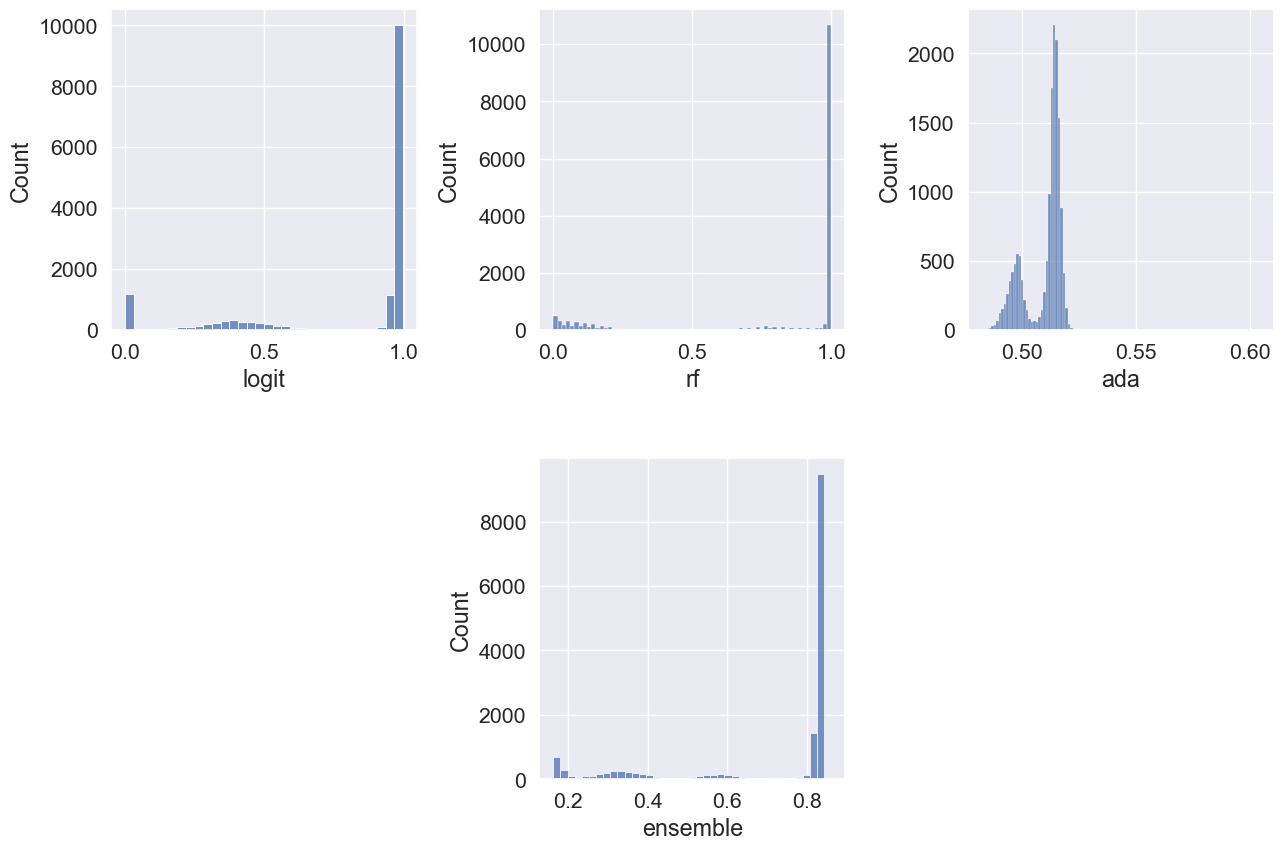

In [38]:
# visualize distributions
# ----------
# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# logit
ax = fig.add_subplot(2, 3, 1)
sns.histplot(probs_df, x="logit", ax=ax)

# random forest
ax = fig.add_subplot(2, 3, 2)
sns.histplot(probs_df, x="rf", ax=ax)

# adaptive boosting
ax = fig.add_subplot(2, 3, 3)
sns.histplot(probs_df, x="ada", ax=ax)

# ensemble
ax = fig.add_subplot(2, 3, 5)
sns.histplot(probs_df, x="ensemble", ax=ax)

# show plot 
plt.show()

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [39]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_validate



# Use StratifiedKFold to maintain class distribution in each fold
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over classifiers and labels
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier, 
                       voting_classifier], 
                      ["Logistic Regression", 
                       "Random Forest", 
                       "Ada Boost",
                       "Ensemble"]):

    # Perform cross-validation with StratifiedKFold
    scores = cross_validate(clf, X, y.ravel(), 
                            scoring={'accuracy': 'accuracy', 
                                     'precision': 'precision_weighted', 
                                     'recall': 'recall_weighted', 
                                     'f1': 'f1_weighted'}, 
                            cv=stratified_kf)
    
    # Print the average of each metric
    print(f'{label} - '
          f'Accuracy: {scores["test_accuracy"].mean():.2f}, '
          f'Precision: {scores["test_precision"].mean():.2f}, '
          f'Recall: {scores["test_recall"].mean():.2f}, '
          f'F1: {scores["test_f1"].mean():.2f}')


Logistic Regression - Accuracy: 0.92, Precision: 0.93, Recall: 0.92, F1: 0.93
Random Forest - Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1: 0.93
Ada Boost - Accuracy: 0.92, Precision: 0.92, Recall: 0.92, F1: 0.92
Ensemble - Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1: 0.93


As explained in detail in the discussion section (Section 5), we are most concerned with reducing false positives (i.e. the rate with which our model thinks we should pass an establishment that should fail). In my opinion, it is better to have a higher false negative rate (i.e. our model predict that establishments should fail when they passed) than the opposite, because when the model predicts an establishment should fail their inspection, perhaps the corresponding policy is not that the auditor automatically fails the establishment, rather, the model's prediction of failure might invite increased scruitny on behalf of the auditor, who then may choose to pass the establishment in the end. 

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

In [40]:
X.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant', 'APPLICATION_TYPE_C_EXPA',
       'APPLICATION_TYPE_C_LOC', 'APPLICATION_TYPE_ISSUE',
       'APPLICATION_TYPE_RENEW'],
      dtype='object')

### Model 1 (Random Forest) Features

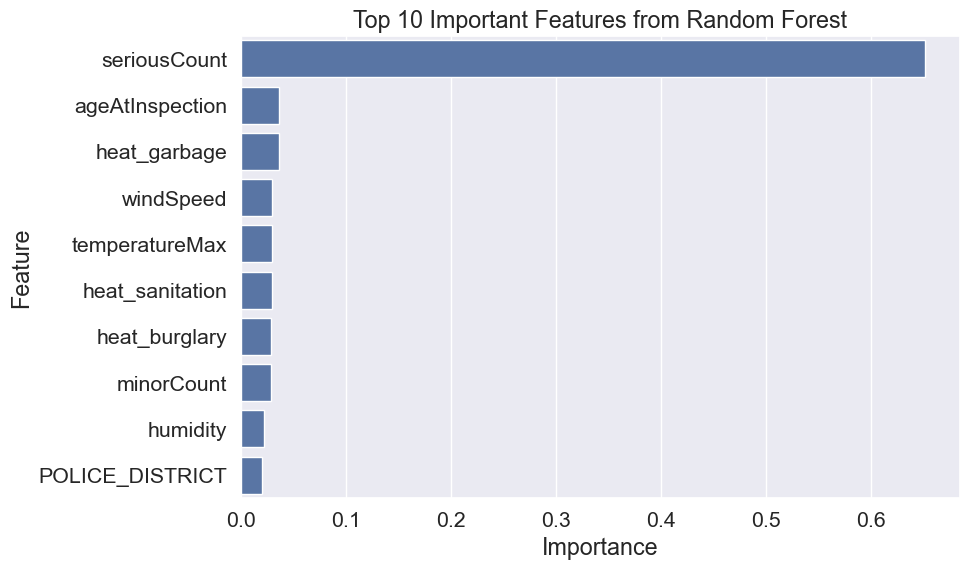

In [41]:
# import library
import seaborn as sns

# ----------
rf_classifier.fit(X, y.to_numpy())

# create feature importance dataframe
rffeat_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_classifier.feature_importances_
})

# plot 
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", 
            y="Feature", 
            data=rffeat_importances.nlargest(10, 'Importance'))

plt.title("Top 10 Important Features from Random Forest")
plt.tight_layout()
plt.show()

### Model 2 (Logistic Regression) Features

In [42]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])



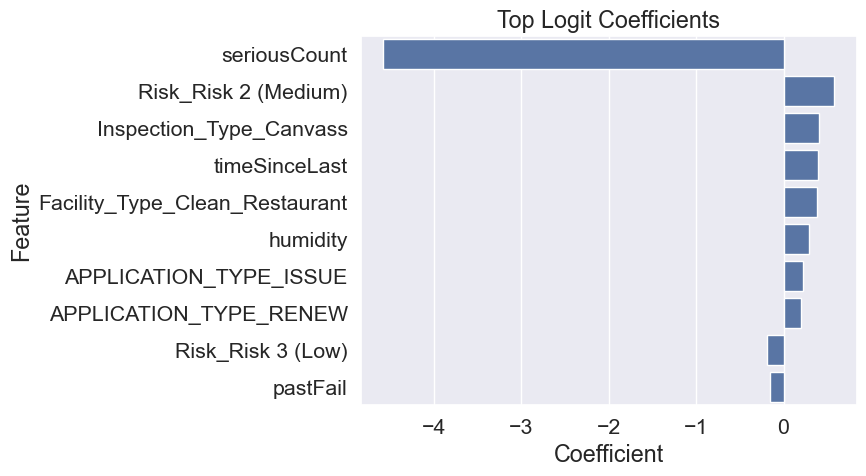

In [43]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

### Model 3 (ADABoost) Features

            Feature  Importance
29  heat_sanitation        0.16
28     heat_garbage        0.12
10  ageAtInspection        0.09
9   POLICE_DISTRICT        0.08
25        windSpeed        0.08
7     timeSinceLast        0.08
1      seriousCount        0.07
26         humidity        0.05
2        minorCount        0.05
24   temperatureMax        0.05


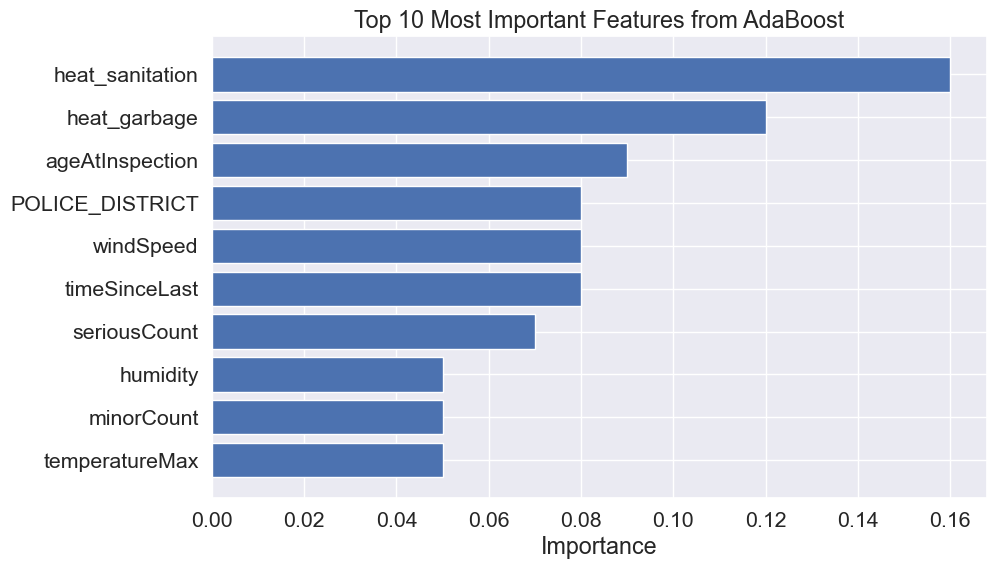

In [44]:
# Access the feature importances
importance = ada_classifier.feature_importances_

# Create a DataFrame to display the feature importances with the feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the DataFrame by the importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 12 features 
top_10_features = feature_importance_df.head(10)

# Print the top 12 feature importances
print(top_10_features)

# Plot the top 15 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features from AdaBoost')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

While some of the features identified by our models make intuitive sense (seriousCount, Risk group, Inspection Type), others are bewildering. *Maybe* we can generously assume that increases in humidity would lead to more mold for places that are not well-ventilated, I fail to see why windspeed could be one of the most important features in our predictions. More globally, my desire isn't necessarily for different features than the ones in these datasets, rather, it is for a data dictionary to understand what these features represent and how they're measured. That would give us a better sense of what's going on here, but alas, we do not have this.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [45]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------


In [46]:
#Order your audits by their probability of detecting a "Fail" score
# Get predicted probabilities for "Fail" class 

y_probs = rf_classifier.predict_proba(X_validate)[:, 0]


# Extract the 'Inspection_ID' and 'DBA_Name' from the index for X_validate (since they're part of the index now)
inspection_ids = chicago_inspections_2011_to_2013.loc[X_validate.index].index.get_level_values('Inspection_ID')
DBA_names = chicago_inspections_2011_to_2013.loc[X_validate.index].index.get_level_values('DBA_Name')

# Create the DataFrame with Fail_Probability and the extracted Inspection_ID
audit_results = pd.DataFrame({
    'Inspection_ID': inspection_ids,  # Extracted from the index
    'DBA_Name': DBA_names,  # Extracted from the index
    'Fail_Probability': y_probs  # The predicted probability for 'Fail'
})

# Add the 'Results' column from y_validate (which contains the actual 'Pass' or 'Fail')
audit_results['Results'] = y_validate.values

# Sort by Fail Probability in descending order
audit_results_sorted = audit_results.sort_values(by='Fail_Probability', ascending=False)

# Display the top 10 audits with the highest 'Fail' probabilities
top_10_audits = audit_results_sorted.head(10)
print(top_10_audits)



      Inspection_ID                                         DBA_Name  \
1947        1154884                        ROSELAND PIZZAS AND TACOS   
32          1277660                                     UKRAINA DELI   
1961         659621                FISH & CHICKEN ON ROOSEVELT ,INC.   
118          598384                              MANJARES AL EXPRESS   
2880        1361059                                   KING FOOD MART   
1117        1367248                               BURGER KING #12371   
1253        1229367                              NORTH SHORE BANQUET   
620         1154798                         SKY LAKE CHINESE KITCHEN   
167         1305318  WASHBURNE CULINARY INSTITUTE INCUBATOR KITCHENS   
2837        1285733                           WILEY'S CHICKEN & RIBS   

      Fail_Probability Results  
1947               1.0    Fail  
32                 1.0    Fail  
1961               1.0    Fail  
118                1.0    Fail  
2880               1.0    Fail  
1117     

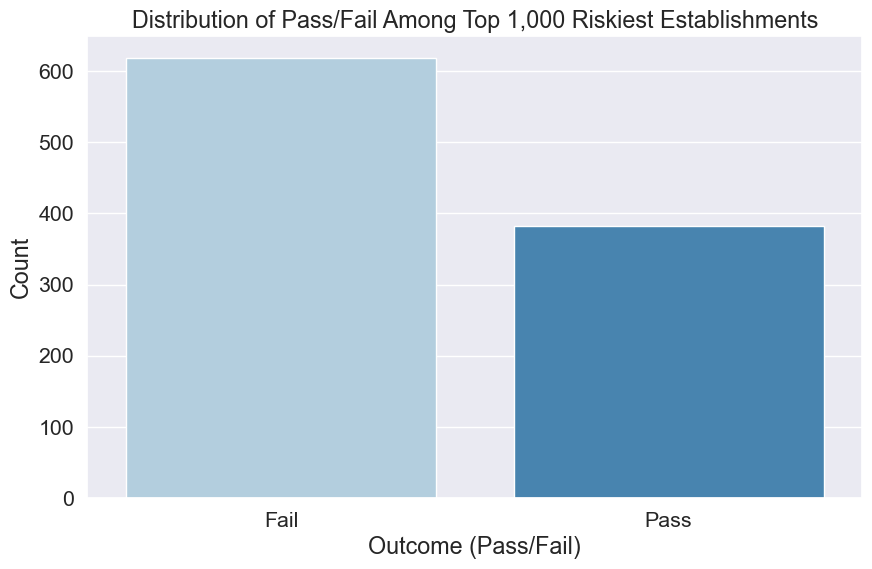

In [47]:
#
# Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# Select the top 1,000 riskiest establishments
top_1000_audits = audit_results_sorted.head(1000)

# Plot the distribution of "Pass" and "Fail" in the top 1,000 audits
plt.figure(figsize=(10, 6))
sns.countplot(x='Results', data=top_1000_audits, palette='Blues')
plt.title("Distribution of Pass/Fail Among Top 1,000 Riskiest Establishments")
plt.xlabel("Outcome (Pass/Fail)")
plt.ylabel("Count")
plt.show()

In [48]:
# Evaluate predictive auditing by counting actual Fail outcomes
actual_fail_predictive = audit_results_sorted.head(1000)['Results'].value_counts()
print(f"Actual Fail Count in Predictive Audits:\n{actual_fail_predictive}")

Actual Fail Count in Predictive Audits:
Results
Fail    618
Pass    382
Name: count, dtype: int64


In [49]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
# Simulate random audits by selecting 1,000 random rows
random_audits = chicago_inspections_2011_to_2013.sample(n=1000, random_state=42)  # Set random_state for reproducibility

In [50]:
# Evaluate random auditing by counting actual Fail outcomes
actual_fail_random = random_audits['Results'].value_counts()
print(f"Actual Fail Count in Random Audits:\n{actual_fail_random}")

Actual Fail Count in Random Audits:
Results
Pass                  672
Fail                  203
Pass w/ Conditions    125
Name: count, dtype: int64


In [51]:
# Calculate percentage of fails in predictive audits
predictive_fail_percentage = actual_fail_predictive['Fail'] / 1000 * 100

# Calculate percentage of fails in random audits
random_fail_percentage = actual_fail_random['Fail'] / 1000 * 100

print(f"Percentage of Fails in Predictive Audits: {predictive_fail_percentage}%")
print(f"Percentage of Fails in Random Audits: {random_fail_percentage}%")

Percentage of Fails in Predictive Audits: 61.8%
Percentage of Fails in Random Audits: 20.3%


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [52]:
columns2011=X.columns

In [53]:
testdata=pd.read_csv("data/Chicago Inspections 2014_updated.csv")
columns2014=testdata.columns

In [54]:
classdistribution2014 = testdata.shape
print(classdistribution2014 )

(4623, 73)


In [55]:
# Find common columns between the two datasets
common_columns = columns2011.intersection(columns2014)
print(f"Common Columns: {common_columns}")

# Find columns that are in the 2011 dataset but not in the 2014 dataset
df1_only_columns = columns2011.difference(columns2014)
print(f"Columns in 2011 but not in 2014: {df1_only_columns}")

# Find columns that are in the 2014 dataset but not in the 2011 dataset
df2_only_columns = columns2014.difference(columns2011)
print(f"Columns in 2014 but not in 2011: {df2_only_columns}")

#Make sure dataset only has columns that are common to both 
testdata = testdata[common_columns]

Common Columns: Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')
Columns in 2011 but not in 2014: Index(['APPLICATION_TYPE_C_EXPA', 'APPLICATION_TYPE_C_LOC',
       'APPLICATION_TYPE_ISSUE', 'APPLICATION_TYPE_RENEW',
       'Facility_Type_Clean_Other', 'Facility_Type_Clean_Restaurant',
       'Inspection_Type_Canvass', 'Risk_Risk 1 (High)', 'Risk_Risk 2

In [56]:
# Process Features (X)
X = testdata
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables

# Save feature columns for later reference
test_columns = X.columns.tolist()

# Load the target variable from CSV (y)
ytarget = pd.read_csv("data/Chicago Inspections 2014_updated.csv")
y = ytarget['Results']  # This is a Series containing the target labels

# Check unique values in 'Results' before replacement
print("Unique values in 'Results' before Replacement:", y.unique())

# Replace "Pass w/ Conditions" with "Pass" in the target variable 'y'
y = y.replace({'Pass w/ Conditions': 'Pass'})

# Check unique values in 'Results' after replacement
print("Unique values in 'Results' After Replacement:", y.unique())

Unique values in 'Results' before Replacement: ['Fail' 'Pass w/ Conditions' 'Pass']
Unique values in 'Results' After Replacement: ['Fail' 'Pass']


In [57]:
class_distribution=y.value_counts()
print("Original class distribution:\n", class_distribution)

Original class distribution:
 Results
Pass    3724
Fail     899
Name: count, dtype: int64


In [58]:
# Split into train/test sets
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Ensure that the columns in X_val match those in X_train
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

In [59]:
# Display the counts of each class
sample_distribution = y_train.value_counts()

# Show the class distribution

print("Class distribution of original dataset:\n", class_distribution)
print("Class distribution of sample:\n", sample_distribution)

Class distribution of original dataset:
 Results
Pass    3724
Fail     899
Name: count, dtype: int64
Class distribution of sample:
 Results
Pass    2968
Fail     730
Name: count, dtype: int64


In [60]:
#Display ratios
# Class counts
pass_count = sample_distribution.get('Pass', 1)
fail_count = sample_distribution.get('Fail', 0)

# Total observations
total_count = pass_count + fail_count 

# Calculate the ratios
pass_ratio = pass_count / total_count
fail_ratio = fail_count / total_count

# Print the ratios
print("Class balance of sample before re-sampling:")
print(f"Pass: {pass_ratio:.3f}")
print(f"Fail: {fail_ratio:.3f}")

Class balance of sample before re-sampling:
Pass: 0.803
Fail: 0.197


In [61]:
total_count=total_count
# intitate instance of sampler and specify strategy
newpass_count2014 = round (.6 * total_count)
newfail_count2014 = round (.4 * total_count)
# Create a dictionary for the sampling strategy (desired target counts)
oversampling_strategy = {
    'Fail': newfail_count2014,
}

undersampling_strategy = {
    'Pass': newpass_count2014,
}

# Apply the RandomOverSampler to increase the minority classes
random_over_sampler = RandomOverSampler(sampling_strategy=oversampling_strategy)

X_train, y_train = random_over_sampler.fit_resample(X_train, y_train)


# Then, apply the RandomUnderSampler to reduce the majority class to .5 ratio
random_under_sampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, 
                                          replacement=True)

X_train, y_train = random_under_sampler.fit_resample(X_train, y_train)


In [62]:
#Display new ratios
# Class counts
finalpass_count = Counter(y_train).get('Pass', 1) 
finalfail_count = Counter(y_train).get('Fail', 0) 


# Total observations
finaltotal_count = finalpass_count + finalfail_count 

# Calculate the ratios
finalpass_ratio = finalpass_count / finaltotal_count
finalfail_ratio = finalfail_count / finaltotal_count

# Print the ratios
print("Class balance after over and undersampling:")
print(f"Pass: {finalpass_ratio:.3f}")
print(f"Fail: {finalfail_ratio:.3f}")

Class balance after over and undersampling:
Pass: 0.600
Fail: 0.400


In [63]:
#initialize a random forest classifier
# ----------
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,              # number of trees
    criterion='gini',              # splitting criterion
    max_depth=None,                # no limit on depth
    min_samples_split=2,           # min samples for splitting a node
    min_samples_leaf=1,            # min samples for a leaf
    min_weight_fraction_leaf=0.0,  # min weighted fraction of leaf
    max_features=None,             # use all features to split
    max_leaf_nodes=None,           # no limit on leaf nodes
    min_impurity_decrease=1e-07,   # early stopping threshold
    random_state=10,               # set random seed for reproducibility
)

In [64]:
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [10, 20, None],          # Max depth of trees
    'min_samples_split': [2, 5, 10]       # Minimum samples required to split a node
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [65]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set (X_test)
y_pred = best_rf.predict(X_val)
probas = best_rf.predict_proba(X_val)

probas_df = pd.DataFrame(probas, columns=['Fail', 'Pass'])

# Print the first 5 rows
print(f"Probabilities for 'Fails' and 'Passes': \n{probas_df.head(5)}")


Probabilities for 'Fails' and 'Passes': 
       Fail      Pass
0  0.000000  1.000000
1  0.000000  1.000000
2  0.840000  0.160000
3  0.000000  1.000000
4  0.926304  0.073696


In [66]:
#Display class distribution
# Class counts
samplepass_count = Counter(y_val).get('Pass', 1) 
samplefail_count = Counter(y_val).get('Fail', 0) 

# Print the class distribution of the validation data
print("Class balance of validation data:")
print(f"Pass: {samplepass_count:.3f}")
print(f"Fail: {samplefail_count:.3f}")

Class balance of validation data:
Pass: 756.000
Fail: 169.000


In [67]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Set Accuracy: {accuracy:.4f}")

#Compare actual vs. predicted Fail counts
actual_fail_count = (y_val == 0).sum()  # Actual 'Fail' counts in y_validate (0 = Fail)
predicted_fail_count = (y_pred == 0).sum()  # Predicted 'Fail' counts in y_pred (0 = Fail)

# Print the actual vs predicted Fail counts
print(f"Actual Fail Count in Validation Data: {actual_fail_count}")
print(f"Predicted Fail Count in Validation Data: {predicted_fail_count}")

Validation Set Accuracy: 0.9005
Actual Fail Count in Validation Data: 0
Predicted Fail Count in Validation Data: 0


This is very strange, I'm not sure why our validation data has no 'Fails.'

In [68]:
# specify cross-validation
# ----------
scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean():.4f}")

Cross-validation scores: [0.90378378 0.88972973 0.89837838 0.8961039  0.88961039]
Average cross-validation score: 0.8955


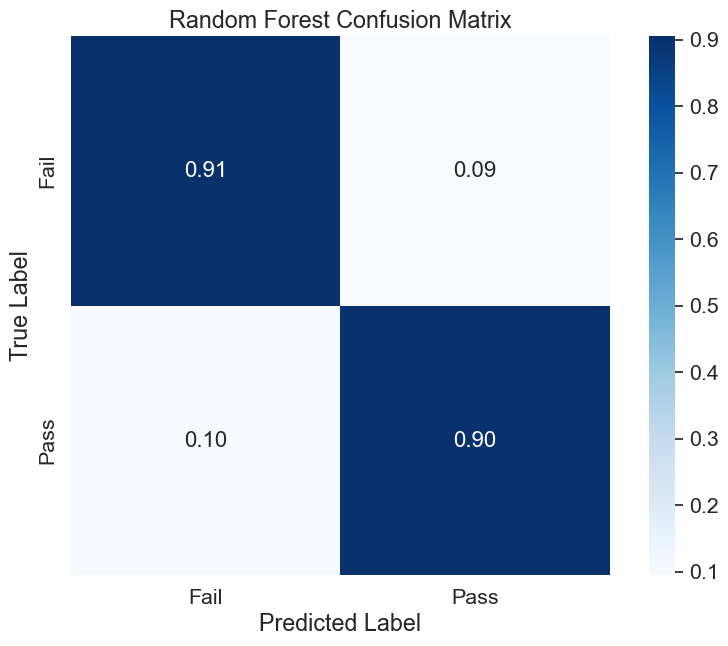

In [69]:
# Generate the confusion matrix
rfcf_matrix = confusion_matrix(y_val, y_pred, 
                               normalize="true")

# Convert to DataFrame
cm_df = pd.DataFrame(rfcf_matrix, 
                           index=['Fail', 'Pass'],  # True labels
                           columns=['Fail', 'Pass'])  # Predicted labels


# Set figure specifications
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # For label size

# Plot the heatmap
sns.heatmap(cm_df, 
            annot=True, 
            annot_kws={"size": 16}, 
            fmt=".2f",  # Format the numbers as floats with 2 decimal places
            cmap="Blues",  # Color scheme for the heatmap
            cbar=True,     # Show the color bar
            square=True)   # Keep the heatmap square

# Titles and labels
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [70]:
# evaluate
# -----------
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Precision, Recall, F1 Score for "Fail" class
precision = precision_score(y_val, y_pred, pos_label='Fail')
recall = recall_score(y_val, y_pred, pos_label='Fail')
f1 = f1_score(y_val, y_pred, pos_label='Fail')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9005
Precision: 0.6681
Recall: 0.9053
F1 Score: 0.7688


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...

Because our goal is to conduct predictive auditing for at-risk establishments, we need to weigh the 'stakes' of our predictions. Of course, our goal is to optimize our rates of 'true' positives and negatives - i.e. the rate which our models correctly predict that an establishment did actually pass or fail their inspection. Additionally, of course, in everything we discuss here, when we refer to True Negatives/Positives, this does not necessarily mean that the given establishment *deserves* to pass in some normative way, it merely indicates that the model's predicted class aligns with the result that establishment received during our period(s) of inquiry. 

Furthermore, we also need to consider the implications of predicting false positives and false negatives. The metrics of accuracy, precision, recall, and the F1 score help us weigh these considerations and prioritize what is important in this context. 

Firstly, accuracy tells us how well we did in predict values *in general*. As in, it tells us the rate of true positives and true negatives together. So, it can tell us about the model's overall performance in predicting true positives and negatives, but it does not disaggregate true positives from true negatives, nor does it tell us about false positives and negatives, which are important to consider as well. We care about how often our model predicted that an establishment would fail their inspection and then the establishment did really fail their inspection, or how often our model predicted that an establishment would pass and then the establishment really did pass, of course, but with *predictive auditing* we also need to consider the stakes of its rates of false positives and negatives. 

Accuracy= TP+TN/TP+TN+FN+FP

In [71]:
print(f"Our model's Accuracy: {accuracy:.4f}")

Our model's Accuracy: 0.9005


Our model has a pretty high rate of accuracy, but there's more to the story.

For example, a false negative in this context means that the model predicted an establishment would fail, but in reality that establishment received a pass in its actual audit. Conversely, a false positive means that the model predicted an establishment would pass, but in reality that establishment failed its inspection. If we are to implement targeted auditing based on our model's predictions, we should be concerned about instances of the latter. This is because we don't want our model to overlook a portion of the businesses that are at-risk (especially if it is instead prioritizing establishments that aren't actually as at-risk, which would be the case if we also have a high rate of false negatives).


Precision tells us how well-calibrated our model's predictions are - it is an expression of how many of our predicted positives were correct. In this context, it tells us how many establishments we predicted would pass that actually did pass their inspection. 

Precision= TP/TP+FP

In [72]:
print(f"Our model's Precision: {precision:.4f}")

Our model's Precision: 0.6681


Our model ultimately did not do so well here.

The distinction between precision and recall is important. Recall takes the entire universe of positive instances (as in all establishments with 'Passes', whether or not we predicted them as such) and asks how many of those actual positive instances did we predict correctly. 

Recall= TP/TP+FN

In [73]:
print(f"Our model's Recall: {recall:.4f}")

Our model's Recall: 0.9053


So, we did worse on precision but better on recall. 


The last metric, F1 score, helps us a little in this regard, as it can penalize low presicion or low recall, or balance them both. 

F1=2x((precisionxrecall)/(precision+recall))

In [74]:
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.7688


2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...

Well, firstly, interestingly enough, our models suggest that important features are not necessarily aspects that an establishment could change about itself in order to try and avoid detection. Although (as mentioned in the above discussion on features) we don't have the data dictionary to understand exactly what these features mean, some of the most evident and important features according to our model are not ones that establishments can so easily manipulate (e.g. 'Serious Count,' 'timeSincelast,' 'POLICE_District,' etc.'

However, as discussed above, there are reasons to believe that there is something a little bit off about our feature plots. Perhaps some  features that are easier for establishments to adapt/change/control (either features we've operationalized or unobserved ones) are actually driving these results, and perhaps establishments are able to adjust accordingly. In that case, it seems sensible to recommend an auditing strategy similar to Ash et al. "A Machine Learning Approach to Analyze and Support Anti-Corruption Policy" (2020). Using the logic of Ash et al. (2020), our higher-level goal should not be to get better at failing inspections for establishments, it should be to reduce the circumstances that cause establishments to fail (circumstances, or features, that presumably make those establishments a health risk for customers). As such, a mixed-system of targeted and random audits seems appropriate to balance the tradeoffs of detecting the most at-risk establishments while reducing establishments' ability to adapt to the auditing strategy.